<a href="https://colab.research.google.com/github/dopplerchase/DRpy/blob/master/notebooks/Example_DPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to DRpy (derpy)

Here is a simple notebook to help you get going.  

### If you want mapping, please install cartopy 

In [1]:
#first install cartopy
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install cartopy

Selecting previously unselected package libgeos-dev.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 8.9MB 2.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 39.3MB/s 
  Created wheel for cartopy: filename=Cartopy-0.17.0-cp36-cp

### Ok, now go clone the repository 

The reason we are cloning the directory is to grab the example file. If you don't need this file, just install this way: 

!pip install git+https://github.com/dopplerchase/DRpy.git

In [2]:
#clone repository
!git clone https://github.com/dopplerchase/DRpy.git

Cloning into 'DRpy'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 186 (delta 30), reused 59 (delta 18), pack-reused 104
Receiving objects: 100% (186/186), 78.38 MiB | 34.07 MiB/s, done.
Resolving deltas: 100% (64/64), done.


### Install it 

In [3]:
import os

#cd into folder
os.chdir('./DRpy/')
#install 
!python setup.py install
#cd into notebooks 
os.chdir('./notebooks/')


running install
running build
running build_py
creating build
creating build/lib
creating build/lib/drpy
copying drpy/__init__.py -> build/lib/drpy
creating build/lib/drpy/core
copying drpy/core/__init__.py -> build/lib/drpy/core
copying drpy/core/gpmdpr.py -> build/lib/drpy/core
creating build/lib/drpy/graph
copying drpy/graph/graph.py -> build/lib/drpy/graph
copying drpy/graph/__init__.py -> build/lib/drpy/graph
copying drpy/graph/colormaps_drpy.py -> build/lib/drpy/graph
running install_lib
creating /usr/local/lib/python3.6/dist-packages/drpy
creating /usr/local/lib/python3.6/dist-packages/drpy/core
copying build/lib/drpy/core/__init__.py -> /usr/local/lib/python3.6/dist-packages/drpy/core
copying build/lib/drpy/core/gpmdpr.py -> /usr/local/lib/python3.6/dist-packages/drpy/core
copying build/lib/drpy/__init__.py -> /usr/local/lib/python3.6/dist-packages/drpy
creating /usr/local/lib/python3.6/dist-packages/drpy/graph
copying build/lib/drpy/graph/graph.py -> /usr/local/lib/python3.6/d

## Now we can actually use it!

In [4]:
import drpy
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
filename = '../example_file/2A.GPM.DPR.V820180723.20200117-S181128-E184127.V06A.RT-H5'

In [22]:
stime = time.time()
dpr = drpy.core.GPMDPR(filename = filename)
dpr.read()
dpr.toxr()
etime = time.time()

print('time elapsed {} seconds'.format(etime-stime))

time elapsed 6.245397329330444 seconds


### lets take a gander at the xarray datatset (.xrds)

xrds stands for xarray dataset
We can see that the data have the original shape of the GPM-DPR data


along_track,cross_track,range

In [10]:
dpr.xrds

<xarray.Dataset>
Dimensions:          (along_track: 2571, cross_track: 25, range: 176)
Coordinates:
    lons             (along_track, cross_track) float32 -71.03669 ... 71.56302
    lats             (along_track, cross_track) float32 21.042902 ... 35.99313
    time             (along_track, cross_track) datetime64[ns] 2020-01-17T18:11:28 ... 2020-01-17T18:41:27
    alt              (along_track, cross_track, range) float64 21.7 ... 0.1236
Dimensions without coordinates: along_track, cross_track, range
Data variables:
    flagSurfaceSnow  (along_track, cross_track) uint8 0 0 0 0 0 0 ... 0 0 0 0 0
    flagPrecip       (along_track, cross_track) int32 0 0 0 0 0 0 ... 0 0 0 0 0
    clutter          (along_track, cross_track, range) int64 0 0 0 0 ... 1 1 1 1
    nearsurfaceKu    (along_track, cross_track) float32 nan nan nan ... nan nan
    nearsurfaceKa    (along_track, cross_track) float32 nan nan nan ... nan nan
    NSKu_c           (along_track, cross_track, range) float32 nan nan ... nan
    MSKa_c           (along_track, cross_track, range) float32 nan nan ... nan
    echotop          (along_track, cross_track, range) int64 0 0 0 0 ... 0 0 0 0
    NSKu             (along_track, cross_track, range) float32 nan nan ... nan
    MSKa             (along_track, cross_track, range) float32 nan nan ... nan
    R                (along_track, cross_track, range) float32 0.0 0.0 ... nan
    Dm_dpr           (along_track, cross_track, range) float32 nan nan ... nan

### let us plot a map of the data, to see where the swath is in the world

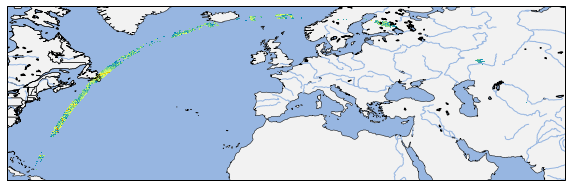

In [23]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as PathEffects
import cartopy.io.shapereader as shpreader

from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.colors as colors
import matplotlib.patheffects as PathEffects

#make figure
fig = plt.figure(figsize=(10, 10))
#add the map
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())

ax.add_feature(cfeature.STATES.with_scale('50m'),lw=0.5)
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
ax.add_feature(cartopy.feature.LAND.with_scale('50m'), edgecolor='black',lw=0.5,facecolor=[0.95,0.95,0.95])
ax.add_feature(cartopy.feature.LAKES.with_scale('50m'), edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS.with_scale('50m'))

ax.pcolormesh(dpr.xrds.lons,dpr.xrds.lats,dpr.xrds.nearsurfaceKu,vmin=12,vmax=50,cmap=drpy.graph.cmaps.HomeyerRainbow)


you can see that the data is quite spread out. Say you are interested in the data near St. Johns Newfoundland, Canada. Lets cut the data to a box around it. 

There are two ways to do this, you can reprocess the original file, or you can use the method to cut the box.

In [0]:
#define box
center_lat =  47.5615
center_lon = -52.7126 
corners = [center_lon - 4,center_lon +4, center_lat-1.8,center_lat+1.8]
#
dpr.corners = corners
#method 2: Cut the exisiting datset 
dpr.setboxcoords()
#drop dead weight (i.e. blank data)
dpr.xrds = dpr.xrds.dropna(dim='along_track',how='all')

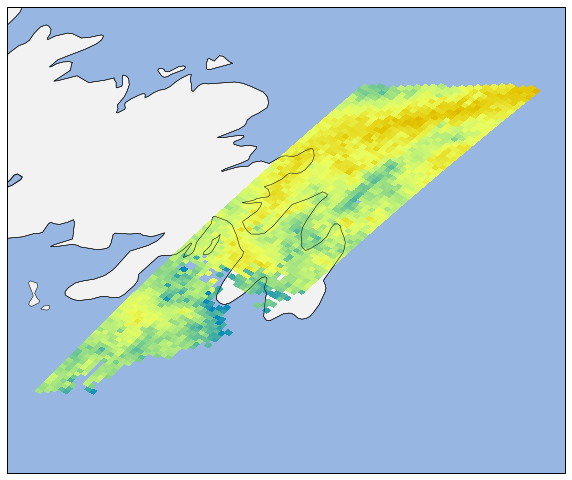

In [25]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as PathEffects
import cartopy.io.shapereader as shpreader

from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.colors as colors
import matplotlib.patheffects as PathEffects

#make figure
fig = plt.figure(figsize=(10, 10))
#add the map
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())

ax.add_feature(cfeature.STATES.with_scale('50m'),lw=0.5)
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
ax.add_feature(cartopy.feature.LAND.with_scale('50m'), edgecolor='black',lw=0.5,facecolor=[0.95,0.95,0.95])
ax.add_feature(cartopy.feature.LAKES.with_scale('50m'), edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS.with_scale('50m'))

ax.pcolormesh(dpr.xrds.lons,dpr.xrds.lats,dpr.xrds.nearsurfaceKu,vmin=12,vmax=50,cmap=drpy.graph.cmaps.HomeyerRainbow)